In [10]:
import pandas as pd
from statistics import mean

df = pd.read_csv('heart-2020-cleaned-numerical.csv')

In [11]:
df = df.replace('Yes', 1, regex=True).replace('No', 0, regex=True).replace('Yes (during pregnancy)', 1, regex=True)
df = df.replace('Female', 0, regex=True).replace('Male', 1, regex=True)
df = df.replace('18-24', 0, regex=True).replace("25-29", 1, regex=True).replace("30-34", 2, regex=True).replace("35-39", 3, regex=True)
df = df.replace("40-44", 4, regex=True).replace("45-49", 5, regex=True).replace("50-54", 6, regex=True).replace("55-59", 7, regex=True)
df = df.replace("60-64", 8, regex=True).replace("65-69", 9, regex=True).replace("70-74", 10, regex=True).replace("75-79", 11, regex=True).replace("80 or older", 12, regex=True)

df =df.replace("American Indian/Alaskan Native", 0, regex=True)
df =df.replace("Asian", 1, regex=True)
df =df.replace("Black", 2, regex=True)
df =df.replace("Hispanic", 3, regex=True)
df =df.replace("White", 4, regex=True)
df =df.replace("Other", 5, regex=True)


In [12]:
hd_true = df[(df['HeartDisease'] == 1)]
n = len(hd_true.index)
hd_false = df[(df['HeartDisease'] == 0)].sample(n)
df_balanced = pd.concat([hd_true, hd_false])
df_balanced.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,AmericanIndian/AlaskanNative,Diabetic,DiabeticWhilePregnant,BorderlineDiabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,1,11,...,0,0,0,0,0,2,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,0,8,...,0,1,0,0,0,1,15.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,0,11,...,0,1,0,0,1,1,4.0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,1,12,...,0,1,0,0,0,3,7.0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,1,11,...,0,1,0,0,1,2,8.0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split
X = df_balanced.loc[:, df_balanced.columns != 'HeartDisease']
y = df_balanced['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X.head(3)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,White,...,AmericanIndian/AlaskanNative,Diabetic,DiabeticWhilePregnant,BorderlineDiabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,28.87,1,0,0,6.0,0.0,1,1,11,0,...,0,0,0,0,0,2,12.0,0,0,0
10,34.30,1,0,0,30.0,0.0,1,0,8,1,...,0,1,0,0,0,1,15.0,1,0,0
35,32.98,1,0,1,10.0,0.0,1,0,11,1,...,0,1,0,0,1,1,4.0,0,0,1


## Exploring Classifier Performance: Logistic Regression, Decision Tree, KNN 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr_model = LogisticRegression(solver='liblinear') 
lr_cv_results = cross_validate(lr_model, X_train, y_train, cv=5, scoring='f1') 
lr_cv_results_mean = mean(lr_cv_results['test_score'])
print('Logistic Regression Results:')
print(lr_cv_results_mean)

Logistic Regression Results:
0.7684425722294782


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_cv_results = cross_validate(dt, X_train, y_train, cv=5, scoring='f1')
dt_cv_results_mean = mean(dt_cv_results['test_score'])
print('Decision Tree Classifier Results:')
print(dt_cv_results_mean)

Decision Tree Classifier Results:
0.6667019651626223


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_cv_results = cross_validate(knn, X_train, y_train, cv=5, scoring='f1')
knn_cv_results_mean = mean(knn_cv_results['test_score'])
print('KNN CLASSIFIER SCORES:')
print(knn_cv_results_mean)

KNN CLASSIFIER SCORES:
0.7226561099819576


Conclusion: Logistic Regression is the best performing classifier

## Tuning ML Model single classifier: Logistic Regression and Decision Tree

In [17]:
from sklearn.model_selection import GridSearchCV
import numpy
parameters = {'C':[pow(10,i) for i in range(0, 10)],'penalty':['l1','l2'], 'intercept_scaling': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
              
lr_clf = GridSearchCV(lr_model, parameters, cv=5, scoring='f1')
lr_clf.fit(X_train, y_train)
print('best parameters:', lr_clf.best_params_)
print('best score:', lr_clf.best_score_)
print('score on testing data:',lr_clf.score(X_test, y_test))


best parameters: {'C': 10, 'intercept_scaling': 0.1, 'penalty': 'l1'}
best score: 0.7685566636153389
score on testing data: 0.7617580425917536


In [18]:
parameters = {'C':[pow(10,i) for i in range(0, 10)],'penalty':['l1','l2'], 'intercept_scaling': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
              
lr_clf = GridSearchCV(lr_model, parameters, cv=5, scoring='roc_auc')
lr_clf.fit(X_train, y_train)
print('best parameters:', lr_clf.best_params_)
print('best score:', lr_clf.best_score_)
print('score on testing data:',lr_clf.score(X_test, y_test))

best parameters: {'C': 1, 'intercept_scaling': 1, 'penalty': 'l1'}
best score: 0.841321569542951
score on testing data: 0.8347593747198658


In [19]:

parameters = {
    'max_depth' : range(9,19, 1), 
    'min_samples_split': range(11, 18, 1),
    'criterion': ['entropy'],
    'max_features': ['sqrt', 'log2', None]
    
}
dt_res = GridSearchCV(dt, parameters, cv=5, scoring='f1')
dt_res.fit(X_train, y_train)
dt_res.cv_results_
print('best parameters: ', dt_res.best_params_)
print('best score:', dt_res.best_score_)
print('score on testing data: ', dt_res.score(X_test, y_test))

best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_split': 17}
best score: 0.7596180247835085
score on testing data:  0.7625066761616521


In [20]:
parameters = {
    'max_depth' : range(9,19, 1), 
    'min_samples_split': range(11, 18, 1),
    'criterion': ['entropy'],
    'max_features': ['sqrt', 'log2', None]
    
}
dt_res = GridSearchCV(dt, parameters, cv=5, scoring='roc_auc')
dt_res.fit(X_train, y_train)
dt_res.cv_results_
print('best parameters: ', dt_res.best_params_)
print('best score:', dt_res.best_score_)
print('score on testing data: ', dt_res.score(X_test, y_test))

best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_split': 16}
best score: 0.8213807462714573
score on testing data:  0.8204421069143878


## Exploring Ensemble Performance

In [21]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier()
cv_results = cross_validate(adaclf, X_train, y_train, cv=5, scoring='f1')
ada_mean = sum(cv_results['test_score'])/len(cv_results['test_score'])
print('ada booster test score: ', ada_mean)

ada booster test score:  0.7649412811266924


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier()
cv_results = cross_validate(gbclf, X_train, y_train, cv=5)
gradient_mean = sum(cv_results['test_score'])/len(cv_results['test_score'])
print('gradient booster test score: ', gradient_mean)

gradient booster test score:  0.7673760870097868


In [23]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
cv_results = cross_validate(rfclf, X_train, y_train, cv=5)
random_mean = sum(cv_results['test_score'])/len(cv_results['test_score'])
print('random forest test score: ', random_mean)

random forest test score:  0.7438352045984273


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
etclf = ExtraTreesClassifier()
cv_results = cross_validate(etclf, X_train, y_train, cv=5)
extra_mean = sum(cv_results['test_score'])/len(cv_results['test_score'])
print('extra trees test score: ', extra_mean)

extra trees test score:  0.7300667702000968


In [25]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgbclf = HistGradientBoostingClassifier()
cv_results = cross_validate(hgbclf, X_train, y_train, cv=5)
histo_mean = sum(cv_results['test_score'])/len(cv_results['test_score'])
print('histogram gradient boosting test score: ', histo_mean)

histogram gradient boosting test score:  0.7642022947303777


## ML Model Performance Visualization

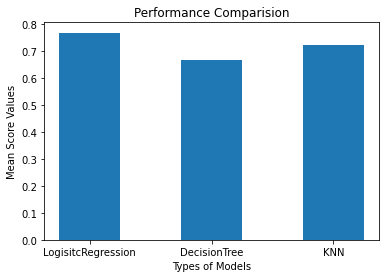

In [27]:
import matplotlib.pyplot as plt

bar_plot_data = {'LogisitcRegression': lr_cv_results_mean, 'DecisionTree': dt_cv_results_mean, 'KNN': knn_cv_results_mean}
types = list(bar_plot_data.keys())
values = list(bar_plot_data.values())

plt.bar(types, values, width=0.5)
plt.xlabel('Types of Models')
plt.ylabel('Mean Score Values')
plt.title('Performance Comparision')

plt.show()

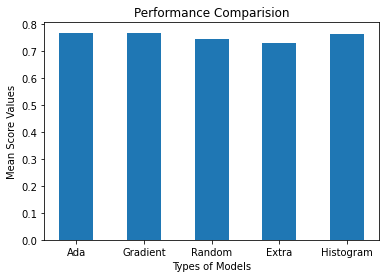

In [28]:
bar_plot_data = {'Ada': ada_mean, 'Gradient': gradient_mean, 'Random': random_mean, 'Extra': extra_mean, 'Histogram': histo_mean}
types = list(bar_plot_data.keys())
values = list(bar_plot_data.values())

plt.bar(types, values, width=0.5)
plt.xlabel('Types of Models')
plt.ylabel('Mean Score Values')
plt.title('Performance Comparision')

plt.show()

## Random Forest Visualization

<AxesSubplot:title={'center':'Random forest importances'}>

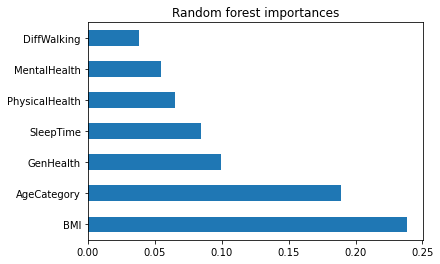

In [30]:
rfclf.fit(X_train, y_train)

pd.Series(rfclf.feature_importances_, index = X_train.columns).nlargest(7).plot(kind = 'barh', title = 'Random forest importances', sort_columns = True)
